
Tutorial Section on SKLEARN


Scikit-learn, also known as sklearn, is an open-source, robust Python machine learning library. It was created to help simplify the process of implementing machine learning and statistical models in Python

In [2]:
#load required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
# Load the wine dataset from sklearn
data = load_breast_cancer()
brca_df= pd.DataFrame(data.data, columns=data.feature_names)
brca_df['target'] = data.target  # Add target column for visualization

In [4]:
# Data Description
print(brca_df.info())  # Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
print(brca_df.shape[0])  # Number of rows

569


In [6]:
print(brca_df.shape[1])  # Number of columns

31


In [7]:
print(brca_df.columns)  # Names of the columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [8]:
# Target (class) distribution
print(brca_df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [9]:
# Summary statistics of 'alcohol' content
print(brca_df['mean texture'].describe())

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: mean texture, dtype: float64


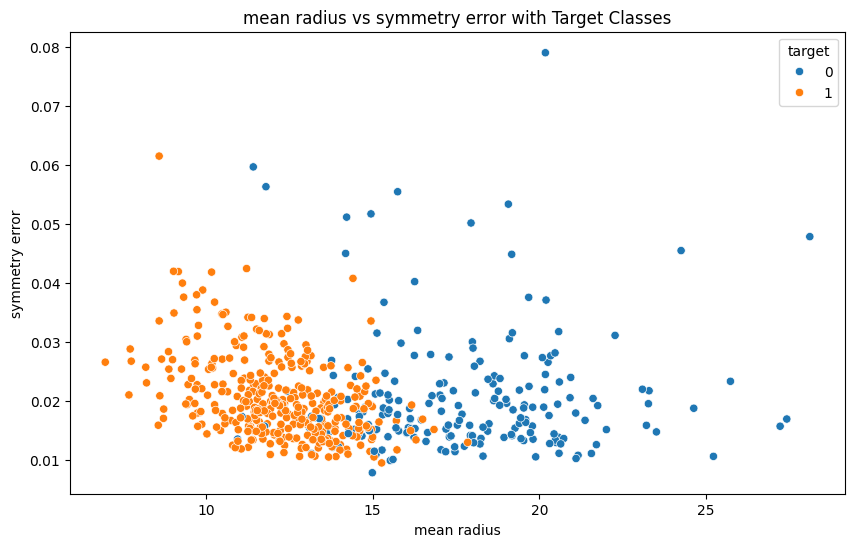

In [10]:
# Scatter plot of 'mean radius' vs 'symmetry error' with target classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean radius', y='symmetry error', hue='target', data=brca_df)
plt.title('mean radius vs symmetry error with Target Classes')
plt.xlabel('mean radius')
plt.ylabel('symmetry error')
plt.show()

In [11]:
# T-test to compare 'mean compactness' content between different target classes
class_0_compactness = brca_df.loc[brca_df['target'] == 0, 'mean compactness']
class_1_compactness = brca_df.loc[brca_df['target'] == 1, 'mean compactness']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(class_0_compactness, class_1_compactness, alternative='two-sided', equal_var=False)
print("T-test (two-sided) p-value:", p_value)

T-test (two-sided) p-value: 9.60786314512351e-42


In [12]:
# T-test to compare 'mean area' content between different target classes
class_0_area = brca_df.loc[brca_df['target'] == 0, 'mean area']
class_1_area = brca_df.loc[brca_df['target'] == 1, 'mean area']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(class_0_area, class_1_area, alternative='two-sided', equal_var=False)
print("T-test (two-sided) p-value:", p_value)

T-test (two-sided) p-value: 3.284366459573324e-52


In [13]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label 
features = brca_df[data.feature_names].copy()
labels = brca_df["target"].copy() 



In [14]:
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(features)

# Transform features
X_scaled = scaler.transform(features.values)



c:\Users\vicky\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# View first instance of scaled data
print(X_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [17]:
# View first instance of unscaled data
print(features.iloc[0])

mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162200
worst compactness        

In [18]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                                  labels,
                                                             train_size=.8,
                                                           random_state=3)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(features) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(features) * 100)}%")



Train size: 80% 
Test size: 20%


In [19]:
from sklearn.linear_model import LogisticRegression
# Initializing the model 
logistic_regression = LogisticRegression()
# Training the models
logistic_regression.fit(X_train_scaled, y_train)
# Making predictions with the model
log_reg_preds = logistic_regression.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print('LR')
print(classification_report(y_test, log_reg_preds))

LR
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.97      0.99      0.98        74

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [20]:
from sklearn.svm import SVC
# Initializing the model 
svm = SVC()
# Training the models
svm.fit(X_train_scaled, y_train)
# Making predictions with the model
svm_preds = svm.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print('SVM')
print(classification_report(y_test, svm_preds))

SVM
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [21]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                                  labels,
                                                             train_size=.7,
                                                           random_state=3)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(features) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(features) * 100)}%")



Train size: 70% 
Test size: 30%


In [22]:
from sklearn.linear_model import LogisticRegression
# Initializing the model 
logistic_regression = LogisticRegression()
# Training the models
logistic_regression.fit(X_train_scaled, y_train)
# Making predictions with the model
log_reg_preds = logistic_regression.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print('LR')
print(classification_report(y_test, log_reg_preds))

LR
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.97      0.99      0.98       109

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [23]:
from sklearn.svm import SVC
# Initializing the model 
svm = SVC()
# Training the models
svm.fit(X_train_scaled, y_train)
# Making predictions with the model
svm_preds = svm.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print('SVM')
print(classification_report(y_test, svm_preds))

SVM
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.97      0.98      0.98       109

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

